In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
orders = pd.read_csv('../data/Orders.csv')
returns = pd.read_csv('../data/Returns.csv')

In [31]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

Clean the Sales & Profit Columns by removing $ and thousand separators; then convert to float type.

In [32]:
orders['Sales']=[x.replace('$', '') for x in orders['Sales']]

In [33]:
orders['Sales']=[x.replace(',', '') for x in orders['Sales']]

In [34]:
orders['Profit']=[x.replace('$', '') for x in orders['Profit']]

In [35]:
orders['Profit']=[x.replace(',', '') for x in orders['Profit']]

In [36]:
orders['Sales'] = orders['Sales'].astype(float)
orders['Profit'] = orders['Profit'].astype(float)

Convert Order.Date to a Pandas Datetime variable

In [37]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [38]:
orders.head(5)

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

        ...         Product.ID    Category Sub.Category  \
0       ...        TEC-PH-5816  Technology       Phones   
1       ...        FUR-CH-5379   Furniture       Chairs   
2       ...        TEC-PH-5356  Technology       Phones   
3       ...        TEC-PH-5267  Technology       Phones   
4       ...        TEC-CO-6011  Technology      Copiers   

                                Product.Name    Sales Quantity Discount  \
0                           Samsung Convoy 3   221.98        2      0.0   
1  Novimex Executive Leather Armchair, Black  3709.40        9      0.1   
2          Nokia Smart Phone, with Caller ID  5175.17        9      0.1   
3             Motorola Smart Phone, Cordless  2892.51        5      0.1   
4             Sharp Wireless Fax, High-Speed  2832.96        8      0.0   

   Profit  Shipping.Cost  Order.Priority  
0   62.15          40.77            High  
1 -288.77         923.63        Critical  
2  919.97         915.49          Medium  
3  -96.54         910.16          Medium  
4  311.52         903.04        Critical  

[5 rows x 24 columns]

Group by & Aggregate Sales & Quantity Variables by Month & Category.

In [39]:
df = orders.groupby(['Order.Date','Category']).agg({'Sales':sum}).reset_index()

In [40]:
df['Month'] = [x.month for x in df['Order.Date']]

In [41]:
df['Year'] = [x.year for x in df['Order.Date']]

In [42]:
df1 = df.groupby(['Month','Category']).agg({'Sales':sum}).reset_index()

In [63]:
df1.head(5)   #Look at grouper so no need to make a column

Month         Category      Sales
0      1        Furniture  228829.15
1      1  Office Supplies  222428.77
2      1       Technology  225531.38
3      2        Furniture  190255.60
4      2  Office Supplies  157169.49

In [43]:
furnsales = df1[df1.Category=='Furniture'].Sales
officesales = df1[df1.Category=='Office Supplies'].Sales
techsales = df1[df1.Category=='Technology'].Sales

In [44]:
mth = list(range(1,13))
mth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

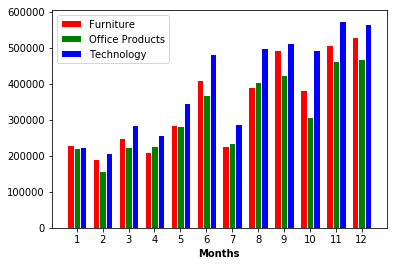

In [45]:
barwidth = 0.25
r1 = mth
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
plt.bar(r1,furnsales,color='red',width=barwidth,edgecolor='white',label='Furniture')
plt.bar(r2,officesales,color='green',width=barwidth,edgecolor='white',label='Office Products')
plt.bar(r3,techsales,color='blue',width=barwidth,edgecolor='white',label='Technology')

plt.xlabel('Months',fontweight='bold')
plt.xticks([r + barwidth for r in mth],mth)

plt.legend()
plt.show()

In [47]:
dfquant = orders.groupby(['Order.Date','Category']).agg({'Quantity':sum}).reset_index()
dfquant['Month'] = [x.month for x in dfquant['Order.Date']]
dfquant['Year'] = [x.year for x in dfquant['Order.Date']]

In [48]:
dfquant1 = dfquant.groupby(['Month','Category']).agg({'Quantity':sum}).reset_index()

In [49]:
furnquant = dfquant1[dfquant1.Category=='Furniture'].Quantity
officequant = dfquant1[dfquant1.Category=='Office Supplies'].Quantity
techquant = dfquant1[dfquant1.Category=='Technology'].Quantity

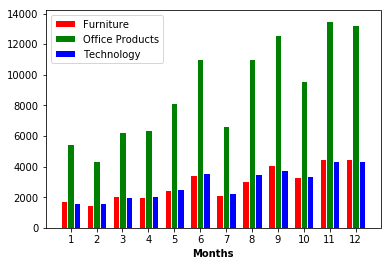

In [50]:
barwidth = 0.25
r1 = mth
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
plt.bar(r1,furnquant,color='red',width=barwidth,edgecolor='white',label='Furniture')
plt.bar(r2,officequant,color='green',width=barwidth,edgecolor='white',label='Office Products')
plt.bar(r3,techquant,color='blue',width=barwidth,edgecolor='white',label='Technology')

plt.xlabel('Months',fontweight='bold')
plt.xticks([r + barwidth for r in mth],mth)

plt.legend()
plt.show()

In [51]:
returns.head(5)

Returned                  Order ID        Region
0      Yes  CA-2012-SA20830140-41210    Central US
1      Yes  IN-2012-PB19210127-41259  Eastern Asia
2      Yes  CA-2012-SC20095140-41174    Central US
3      Yes    IN-2015-JH158207-42140       Oceania
4      Yes    IN-2014-LC168857-41747       Oceania

In [52]:
orders = orders.set_index(['Order.ID'])

In [53]:
returns = returns.set_index(['Order ID'])

In [57]:
ordersreturns = pd.merge(orders,returns,left_index=True,right_index=True)

In [81]:
ordersreturns=ordersreturns.reset_index().rename(columns = {'index':'Order.ID'})
ordersreturns.head(5)

Order.ID  Row.ID Order.Date Ship.Date       Ship.Mode  \
0  AE-2014-MY7380138-42004   48617 2014-12-31    1/3/15    Second Class   
1  AE-2014-MY7380138-42004   48618 2014-12-31    1/3/15    Second Class   
2    AG-2013-PO88653-41634   48662 2013-12-26  12/30/13  Standard Class   
3    AG-2013-PO88653-41634   48661 2013-12-26  12/30/13  Standard Class   
4    AG-2014-CM21603-41755   42400 2014-04-26    5/1/14  Standard Class   

  Customer.ID      Customer.Name    Segment  Postal.Code            City  \
0  MY-7380138    Maribeth Yedwab  Corporate          NaN  Ras al Khaymah   
1  MY-7380138    Maribeth Yedwab  Corporate          NaN  Ras al Khaymah   
2    PO-88653  Patrick O'Donnell   Consumer          NaN          Guelma   
3    PO-88653  Patrick O'Donnell   Consumer          NaN          Guelma   
4    CM-21603  Charles McCrossin   Consumer          NaN         Algiers   

   ...                         Product.Name    Sales Quantity Discount  \
0  ...                  Tenex Folders, Blue     6.97        1      0.7   
1  ...   Stiletto Letter Opener, High Speed    16.67        2      0.7   
2  ...      Hewlett Fax Machine, High-Speed  1908.72        6      0.0   
3  ...          Sanford Markers, Easy-Erase    23.52        1      0.0   
4  ...          Kleencut Trimmer, Easy Grip    43.05        1      0.0   

   Profit Shipping.Cost Order.Priority Returned      Region_y  Year  
0   -8.60          1.75           High      Yes  Western Asia  2014  
1  -29.47          1.41           High      Yes  Western Asia  2014  
2  190.80        169.70           High      Yes  North Africa  2013  
3    0.45          2.69           High      Yes  North Africa  2013  
4   10.32          1.28         Medium      Yes  North Africa  2014  

[5 rows x 27 columns]

How much profit has been lost on returns?  sum the profit column for returned items.

In [59]:
sum(ordersreturns.Profit)

61370.75000000006

In [65]:
ordersreturns['Year'] = [x.year for x in ordersreturns['Order.Date']]

In [68]:
ordersreturns.shape

(2220, 26)

Number of Unique Customers Who Returned Items, as measured by Unique Customer ID#

In [60]:
ordersreturns['Customer.ID'].nunique()

1061

Customers who returned 5x or more - value counts

In [86]:
customercounts = ordersreturns['Customer.ID'].value_counts() 

In [87]:
(customercounts[customercounts >4]).count()

80

In [83]:
ordersreturns.Category.value_counts()

Office Supplies    1348
Technology          445
Furniture           427
Name: Category, dtype: int64

In [88]:
count_returns = ordersreturns.groupby(['Customer.Name']).count()['Sales']

In [91]:
sum(count_returns >= 1)

593

In [95]:
ordersreturns.Region_y.value_counts()

Central America      248
Western Europe       233
Western US           180
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            71
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Eastern Canada        10
Central Asia           9
Western Canada         5
Name: Region_y, dtype: int64

In [96]:
ordersreturns.columns

Index(['Order.ID', 'Row.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Returned', 'Region_y',
       'Year'],
      dtype='object')